# Team  A : XEntropistes- code source- Visualisation

# Importation des bibliothèques

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Importation des données

In [56]:
data=pd.read_csv("COOKIES_80.csv")
sub=pd.read_csv("SUBSCRIBERS_80.csv")


# Test sur les valeurs manquantes

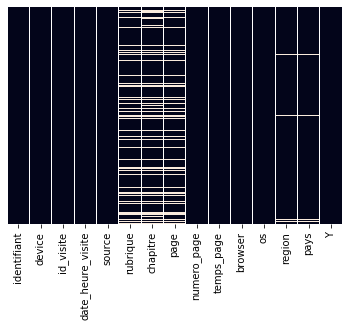

In [60]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

# Merge des tables

In [62]:
subscribed = data.merge(sub, on='identifiant')
non_subscribed=X[~X['identifiant'].isin(subscribed['identifiant'])]
subscribed['TARGET']=1
non_subscribed['TARGET']=0
data=pd.concat([subscribed,non_subscribed], ignore_index=True)
data

/Users/BouriMed/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,identifiant,device,id_visite,date_heure_visite,source,rubrique,chapitre,page,numero_page,temps_page,browser,os,region,pays,Y,TARGET
0,DI1545608,Ordinateur,173698,04SEP16:14:45:10,Reseaux Sociaux,NaN,NaN,NaN,0,0,Chrome 52.x,Windows 10,GR466,GC1,1,1
1,DI1545608,Ordinateur,211068,10SEP16:16:43:26,Acces Direct,NaN,NaN,NaN,0,0,Chrome 52.x,Windows 10,GR466,GC1,1,1
2,DI1545608,Ordinateur,173698,04SEP16:14:45:10,Reseaux Sociaux,DL3,PC11,PA187,1,902,Chrome 52.x,Windows 10,GR466,GC1,1,1
3,DI1545608,Ordinateur,173698,04SEP16:14:45:10,Reseaux Sociaux,DL3,PC11,PA187,2,902,Chrome 52.x,Windows 10,GR466,GC1,1,1
4,DI1545608,Ordinateur,173698,04SEP16:14:45:10,Reseaux Sociaux,DL3,PC11,PA187,3,902,Chrome 52.x,Windows 10,GR466,GC1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113610,DI1784220,Ordinateur,134535,28SEP16:10:06:34,Acces Direct,home_page,home_page,home_page,11,0,Chrome 53.x,Windows 7,GR477,GC1,0,0
2113611,DI1784220,Ordinateur,280862,28SEP16:15:01:50,Acces Direct,home_page,home_page,home_page,1,0,Chrome 53.x,Windows 7,GR477,GC1,0,0
2113612,DI1437401,Smartphone,354914,01SEP16:19:57:42,Moteurs,NaN,NaN,NaN,0,0,Chrome 52.x,Android 4.4.x,GR482,GC1,0,0
2113613,DI1437401,Smartphone,354914,01SEP16:19:57:42,Moteurs,DL23,PC132,PA70,1,17,Chrome 52.x,Android 4.4.x,GR482,GC1,0,0


On voit clairement que la base de données "data" contient maintenant la variable "TARGET"

# Analyse descriptive

#        Variables quantitatives


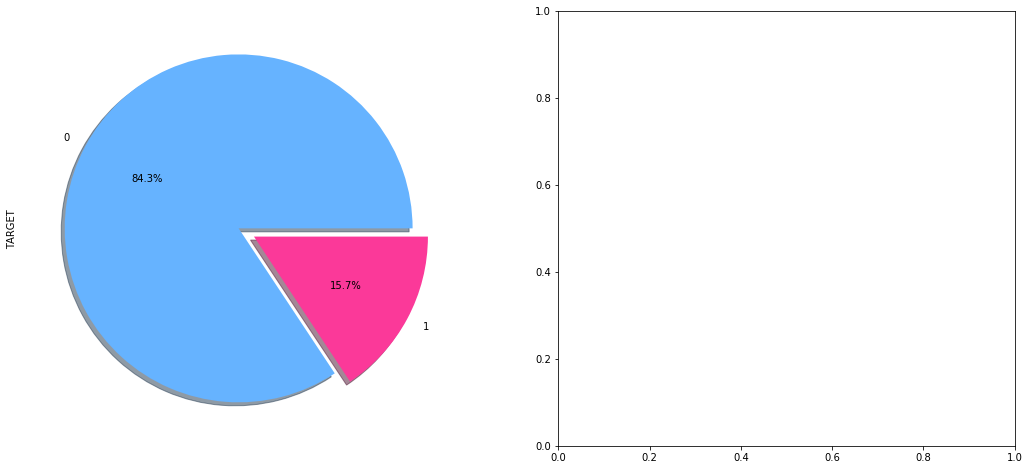

In [63]:
f,ax=plt.subplots(1,2,figsize=(18,8))
colors = ['#66b3ff', '#fb3999']
data['TARGET'].value_counts().plot.pie(explode=[0,0.1],colors = colors,autopct='%1.1f%%',ax=ax[0],shadow=True)
plt.show()

# Variables qualitatives


Device

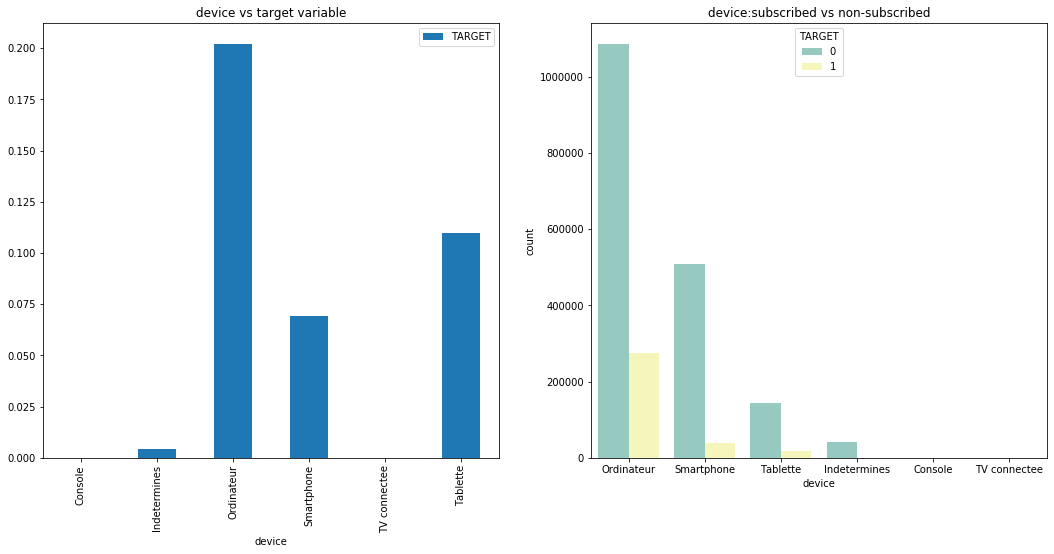

In [65]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['device','TARGET']].groupby(['device']).mean().plot.bar(ax=ax[0])
ax[0].set_title('device vs target variable')
sns.countplot('device',hue='TARGET',data=data,ax=ax[1],palette="Set3")
ax[1].set_title('device:subscribed vs non-subscribed')
plt.show()

Source

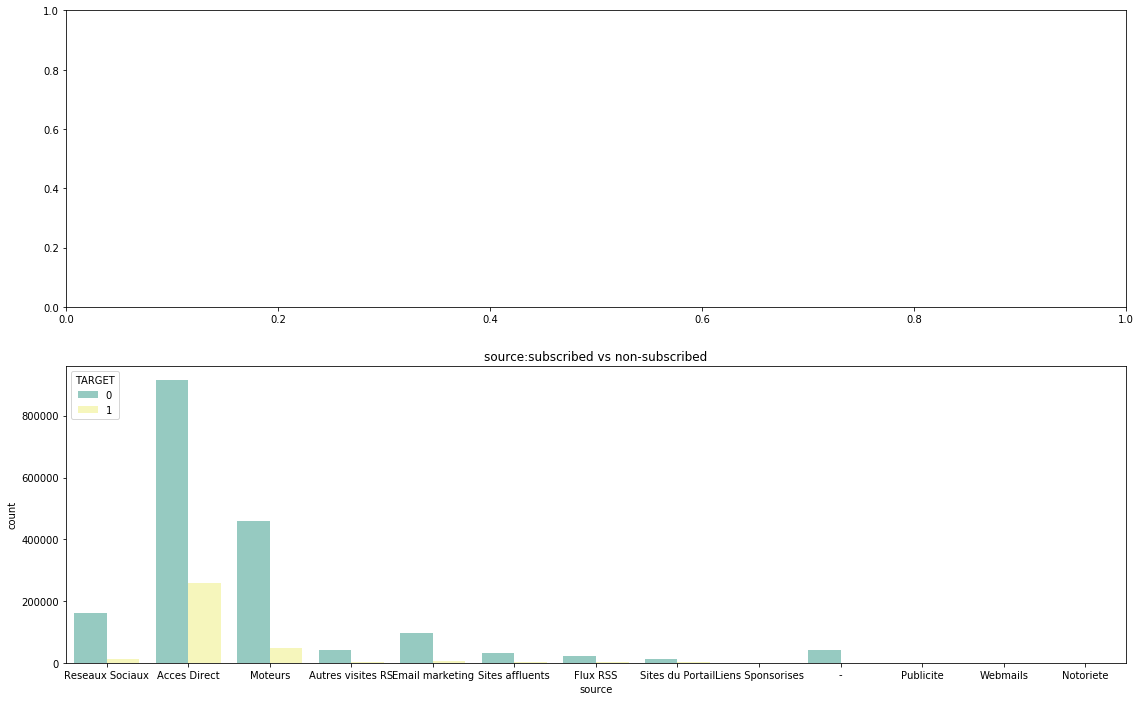

In [66]:
f,ax=plt.subplots(2,figsize=(19,12))

sns.countplot('source',hue='TARGET',data=data,ax=ax[1],palette="Set3")
ax[1].set_title('source:subscribed vs non-subscribed')
plt.show()


Rubrique

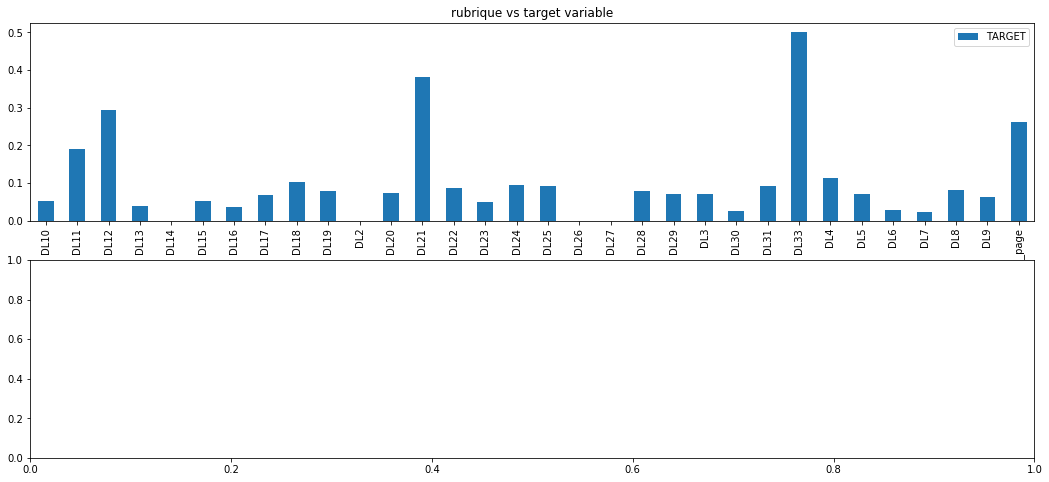

In [67]:
f,ax=plt.subplots(2,figsize=(18,8))
data[['rubrique','TARGET']].groupby(['rubrique']).mean().plot.bar(ax=ax[0])
ax[0].set_title('rubrique vs target variable')

plt.show()

